# CUDA 및 Pytorch 버전 확인

In [ ]:
import torch
print(torch.__version__)

In [ ]:
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda:0' if USE_CUDA else 'cpu')

print('CUDA 사용 가능 여부 :', USE_CUDA)
print('현재 사용 device :', device)
print('CUDA Index :', torch.cuda.current_device())
print('GPU 이름 :', torch.cuda.get_device_name())
print('GPU 개수 :', torch.cuda.device_count())

# pdf를 전부 고화질 jpg로 변경

In [ ]:
# example.pdf 이미지로 변환
from pdf2image import convert_from_path
import os

# PDF 파일 경로
pdf_path = 'example.pdf'

# 출력 디렉토리 (JPG 파일을 저장할 경로)
output_dir = 'output1/'
os.makedirs(output_dir, exist_ok=True)

# PDF 파일의 모든 페이지를 고해상도로 변환
# dpi를 높이면 화질이 개선됩니다. 일반적으로 300 ~ 600dpi가 고해상도 출력에 적합합니다.
images = convert_from_path(pdf_path, dpi=600)

# 변환된 이미지들을 JPG로 저장
for i, image in enumerate(images):
    output_image_path = os.path.join(output_dir, f'page_{i+1}.jpg')
    
    # 이미지의 화질을 유지하며 저장 (JPEG 품질 95 설정)
    image.save(output_image_path, 'JPEG', quality=95)
    print(f'Saved: {output_image_path}')

print("모든 페이지가 성공적으로 JPG로 변환되었습니다.")

In [ ]:
# example2.pdf 이미지로 변환
from pdf2image import convert_from_path
import os

# PDF 파일 경로
pdf_path = 'example2.pdf'

# 출력 디렉토리 (JPG 파일을 저장할 경로)
output_dir = 'output2/'
os.makedirs(output_dir, exist_ok=True)

# PDF 파일의 모든 페이지를 고해상도로 변환
# dpi를 높이면 화질이 개선됩니다. 일반적으로 300 ~ 600dpi가 고해상도 출력에 적합합니다.
images = convert_from_path(pdf_path, dpi=600)

# 변환된 이미지들을 JPG로 저장
for i, image in enumerate(images):
    output_image_path = os.path.join(output_dir, f'page_{i+1}.jpg')
    
    # 이미지의 화질을 유지하며 저장 (JPEG 품질 95 설정)
    image.save(output_image_path, 'JPEG', quality=95)
    print(f'Saved: {output_image_path}')

print("모든 페이지가 성공적으로 JPG로 변환되었습니다.")

# Roboflow로 데이터셋 생성

# YOLO v8로 학습 및 테스트

In [ ]:
# GPU 사용 가능 여부 확인
import torch
print(torch.cuda.is_available())  # True가 출력되면 GPU 사용 가능

In [ ]:
# 모델 학습
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

model.train(data='./train-test.yaml', device='cuda' , epochs=20)

In [ ]:
# 테스트
results = model.val(data='./train-test.yaml')
print(results)

In [19]:
# 모델 저장
model_path = "danbi-s-v1.pt"
model.save(model_path)

# 잘 동작하는지 테스트

In [1]:
from ultralytics import YOLO
import cv2
# import matplotlib.pyplot as plt

# 저장된 모델 불러오기
model = YOLO("danbi-m-v1.pt")

target_img = "output2/page_30.jpg"

# 이미지 예측
results = model.predict(source=target_img, device='cuda', save=False, show=False)  # 이미지 경로 설정

# 예측된 결과 가져오기
predictions = results[0]  # 첫 번째 이미지 결과 (리스트 형식)

# 이미지 읽기
image = cv2.imread(target_img)

# 바운딩 박스 그리기
for box in predictions.boxes:
    x1, y1, x2, y2 = box.xyxy[0]  # 좌표 추출
    label = int(box.cls)  # 클래스 인덱스
    confidence = box.conf[0]  # 확률
    label_name = predictions.names[label]  # 클래스 이름

    # 바운딩 박스 그리기
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, f'{label_name} {confidence:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# 이미지 저장
output_filename = "detect_test-m3.png"
cv2.imwrite(output_filename, image)

print(f"결과 이미지가 {output_filename}로 저장되었습니다.")



image 1/1 c:\Users\effor\Desktop\Project\mathbank\output2\page_30.jpg: 640x480 9 problems, 63.3ms
Speed: 6.4ms preprocess, 63.3ms inference, 258.5ms postprocess per image at shape (1, 3, 640, 480)
결과 이미지가 detect_test-m3.png로 저장되었습니다.


In [ ]:
# # small은 잘 보이는데 x는 안보여서 일단 사용 정지
# from ultralytics import YOLO
# import cv2
# import matplotlib.pyplot as plt

# # 저장된 모델 불러오기
# model = YOLO("danbi-x-v1.pt")

# target_img = "output2/page_16.jpg"

# # 이미지 예측
# results = model.predict(source=target_img, save=False, show=False)  # 이미지 경로 설정

# # 예측된 결과 가져오기
# predictions = results[0]  # 첫 번째 이미지 결과 (리스트 형식)

# # 이미지 읽기
# image = cv2.imread(target_img)

# # 바운딩 박스 그리기
# for box in predictions.boxes:
#     x1, y1, x2, y2 = box.xyxy[0]  # 좌표 추출
#     label = int(box.cls)  # 클래스 인덱스
#     confidence = box.conf[0]  # 확률
#     label_name = predictions.names[label]  # 클래스 이름

#     # 바운딩 박스 그리기
#     cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
#     cv2.putText(image, f'{label_name} {confidence:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# # Matplotlib을 이용해 이미지 출력
# plt.figure(figsize=(10, 10))
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

# 인식한 객체 자르기까지 수행


image 1/1 c:\Users\effor\Desktop\Project\mathbank\output2\page_30.jpg: 640x480 9 problems, 17.0ms
Speed: 3.0ms preprocess, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
9 objects saved in detect_problem folder with base name 'page_30'.


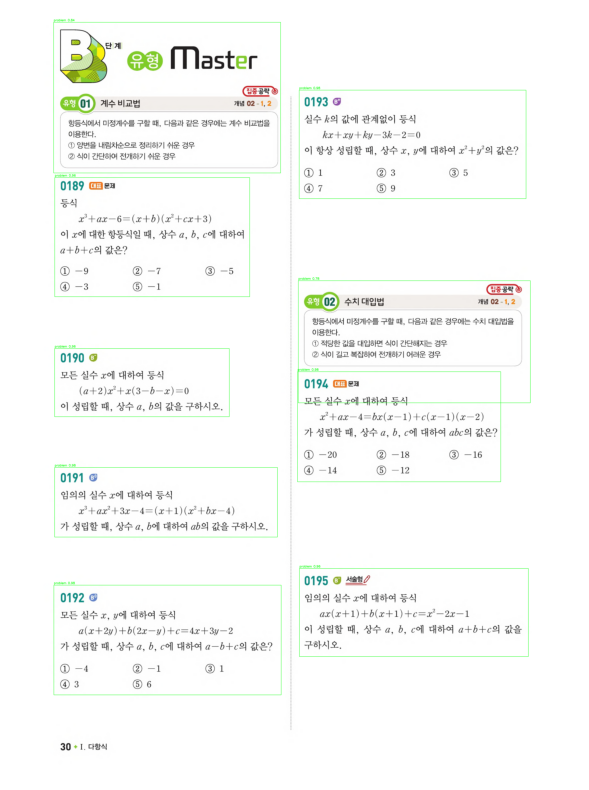

In [2]:
# 인식한 객체 크기로 자르기

import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 저장된 모델 불러오기
model = YOLO("danbi-m-v1.pt")

target_img = "output2/page_30.jpg"

# 파일 이름 추출 (확장자 제거)
base_name = os.path.splitext(os.path.basename(target_img))[0]

# 예측된 이미지의 DPI를 600으로 설정하는 함수
def save_image_with_dpi(image, path, dpi=600):
    height, width = image.shape[:2]
    fig = plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)
    ax = fig.add_subplot(111)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    fig.savefig(path, dpi=dpi, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# 예측된 이미지로부터 객체 자르기 및 저장하기
def save_detected_objects(image, predictions, base_name, folder_name='detect_problem'):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    object_count = 1  # 이미지 번호를 1부터 시작
    for box in predictions.boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # 좌표 추출
        cropped_img = image[int(y1):int(y2), int(x1):int(x2)]  # 객체 영역 자르기
        
        # 객체를 파일로 저장 (base_name 기반)
        file_path = os.path.join(folder_name, f'{base_name}_{object_count}.png')
        save_image_with_dpi(cropped_img, file_path, dpi=600)
        object_count += 1

    print(f"{object_count - 1} objects saved in {folder_name} folder with base name '{base_name}'.")

# 이미지 예측
results = model.predict(source=target_img, save=False, show=False)  # 이미지 경로 설정

# 예측된 결과 가져오기
predictions = results[0]  # 첫 번째 이미지 결과 (리스트 형식)

# 이미지 읽기
image = cv2.imread(target_img)

# 예측된 객체를 잘라서 저장 (base_name 기반)
save_detected_objects(image, predictions, base_name, folder_name='detect_problem')

# 바운딩 박스 그린 결과 이미지 보여주기 (옵션)
for box in predictions.boxes:
    x1, y1, x2, y2 = box.xyxy[0]  # 좌표 추출
    label = int(box.cls)  # 클래스 인덱스
    confidence = box.conf[0]  # 확률
    label_name = predictions.names[label]  # 클래스 이름

    # 바운딩 박스 그리기
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, f'{label_name} {confidence:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Matplotlib을 이용해 바운딩 박스가 그려진 이미지 출력 (옵션)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


---

# OpenCV로 시도 (실패)

In [ ]:
import cv2

# GPU 지원 확인
if cv2.cuda.getCudaEnabledDeviceCount() > 0:
    print("CUDA GPU 사용 가능!")
    # 예시로 이미지 처리 작업을 GPU로 수행
    img = cv2.imread('image.jpg')
    gpu_img = cv2.cuda_GpuMat()
    gpu_img.upload(img)

    # GPU에서 블러링 수행
    gpu_result = cv2.cuda.filter2D(gpu_img, -1, kernel)
    result = gpu_result.download()  # 결과를 CPU로 다운로드
else:
    print("CUDA GPU 사용 불가")

In [ ]:
# import cv2

# # 이미지 불러오기
# image = cv2.imread('output_jpg_images/page_12.jpg')

# # 1. 그레이스케일 변환
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # 2. 블러 적용 (노이즈 제거)
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# # 3. 엣지 검출 (Canny Edge Detection)
# edges = cv2.Canny(blurred, 50, 150)

# # 4. 윤곽선 검출
# contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # 5. 특정 크기 이상의 윤곽선만 처리 (너무 작은 영역은 무시)
# min_width, min_height = 20, 20  # 최소 크기 기준을 문제의 크기에 맞춰 설정

# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
    
#     # 큰 문제 단위만 처리
#     if w > min_width and h > min_height:
#         # 원본 이미지 위에 사각형 그리기
#         cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # 초록색 사각형

# # 6. 결과 이미지를 파일로 저장
# cv2.imwrite('char_detect.jpg', image)


In [ ]:
# import cv2
# import numpy as np

# # 이미지 불러오기
# image = cv2.imread('output_jpg_images/page_12.jpg')

# # 1. 그레이스케일 변환
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # 2. 이진화 적용 (adaptive thresholding)
# binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 10)

# # 3. 모폴로지 변환 적용 (침식 후 팽창, 즉 closing 작업으로 글자들이 모여있는 영역 인식)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))  # 블록 크기를 조정하여 인식할 영역 크기 변경 가능
# morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# # 4. 윤곽선 검출 (모폴로지 변환 후 텍스트 블록 찾기)
# contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # 5. 윤곽선 기반으로 사각형 그리기 (글자 집합으로 인식된 영역)
# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
    
#     # 특정 크기 이상의 윤곽선만 처리 (너무 작은 영역은 무시)
#     if w > 100 and h > 100:  # 이 값을 조정하여 작은 텍스트는 무시 가능
#         # 원본 이미지 위에 사각형 그리기
#         cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # 초록색 사각형

# # 6. 결과 이미지를 파일로 저장
# cv2.imwrite('text_detect.jpg', image)


In [4]:
# 그나마 나은 버전

import cv2
import numpy as np

# 이미지 불러오기
image = cv2.imread('output1/page_12.jpg')

# 1. 그레이스케일 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. 이미지 이진화 (Global Threshold 적용)
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# 3. 모폴로지 연산으로 텍스트 영역 강조 (Close 연산: 팽창 후 침식)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 5))  # 텍스트 블록의 가로길이를 고려한 커널 설정
morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# 4. 윤곽선 검출
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. 윤곽선 기반으로 사각형 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # 특정 크기 이상의 윤곽선만 처리 (너무 작은 영역은 무시)
    if w > 100 and h > 20:  # 너비와 높이 기준을 조정하여 작은 텍스트 제외
        # 원본 이미지 위에 사각형 그리기
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # 초록색 사각형

# 6. 결과 이미지 저장
cv2.imwrite('text_detect_2.jpg', image)


True

In [ ]:
# import cv2

# # 이미지 불러오기
# image = cv2.imread('output_jpg_images/page_12.jpg')

# # 1. 그레이스케일 변환
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # 2. 이진화 적용 (글로벌 이진화 적용)
# _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# # 3. 모폴로지 연산으로 텍스트 영역 강조 (Close 연산: 글자들 간의 간격을 메움)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))  # 가로로 긴 커널을 사용하여 텍스트가 포함된 블록 검출
# morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# # 4. 윤곽선 검출
# contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # 5. 윤곽선 필터링 및 사각형 그리기
# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
    
#     # 너무 크거나 작은 윤곽선은 무시
#     if 100 < w < 1000 and 50 < h < 300:  # 그림을 제외하기 위한 크기 조건 설정
#         # 원본 이미지 위에 사각형 그리기
#         cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# # 6. 결과 이미지를 파일로 저장
# cv2.imwrite('detected_problems.jpg', image)
